<a href="https://colab.research.google.com/github/jhomolos/data_projects/blob/main/Variaveis_Dummy_409.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercicio Pratico**

O banco que solicitou o modelo de limite de credito incluiu novas variaveis no dataset como escolaridade, gênero e Estado do cliente.
Faça as transformacoes necessarias nessas variaveis Dummies e tire o
modelo OLS até que o modelo fique ajustado


In [1]:
import pandas as pd
import numpy as ny
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
df = pd.read_excel('409 - Limite_Credito_Dummy.xlsx')
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [5]:
df.rename(columns={'Gênero': 'Regiao'}, inplace=True)
df.rename(columns={'Região': 'Genero'}, inplace=True)
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,Genero,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [6]:
# transformando variáveis categóricas em numéricas
df = pd.get_dummies(df, columns=['Escolaridade', 'Regiao','Genero'], prefix = ['Escolaridade', 'Regiao', 'Genero'])
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Regiao_RJ,Regiao_SP,Genero_F,Genero_M
0,70,10736,5214,400,500,True,False,True,False,True,False
1,68,5000,5000,380,600,True,False,True,False,True,False
2,44,5800,5800,500,800,True,False,True,False,True,False
3,72,4300,4300,2000,1000,True,False,True,False,True,False
4,75,4400,4400,3000,1000,True,False,True,False,True,False


In [7]:
# mudando o tipo das variaveis das colunas novas de boolean para int
df['Escolaridade_Fundamental_Medio'] = df['Escolaridade_Fundamental_Medio'].astype(int)
df['Escolaridade_Superior_Pos'] = df['Escolaridade_Superior_Pos'].astype(int)
df['Regiao_RJ'] = df['Regiao_RJ'].astype(int)
df['Regiao_SP'] = df['Regiao_SP'].astype(int)
df['Genero_F'] = df['Genero_F'].astype(int)
df['Genero_M'] = df['Genero_M'].astype(int)
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial,Escolaridade_Fundamental_Medio,Escolaridade_Superior_Pos,Regiao_RJ,Regiao_SP,Genero_F,Genero_M
0,70,10736,5214,400,500,1,0,1,0,1,0
1,68,5000,5000,380,600,1,0,1,0,1,0
2,44,5800,5800,500,800,1,0,1,0,1,0
3,72,4300,4300,2000,1000,1,0,1,0,1,0
4,75,4400,4400,3000,1000,1,0,1,0,1,0


In [8]:
#verificando nulos
df.isna().sum()

Idade                             0
RendimentoTotal                   0
Salario                           0
LimitedeCreditoImediato           0
LimitedoChequeEspecial            0
Escolaridade_Fundamental_Medio    0
Escolaridade_Superior_Pos         0
Regiao_RJ                         0
Regiao_SP                         0
Genero_F                          0
Genero_M                          0
dtype: int64

In [9]:
#verificando duplicados
df.duplicated().sum()

0

<Axes: >

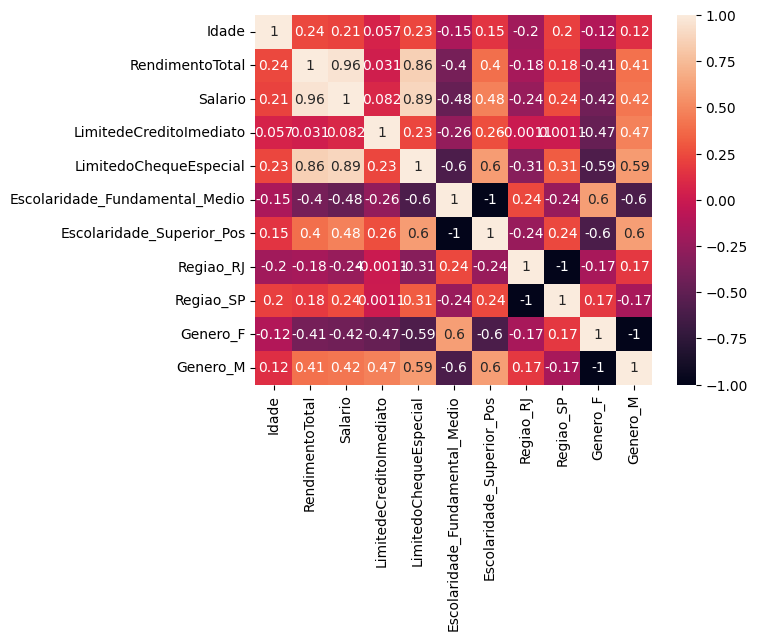

In [18]:
# verificando correlação
sns.heatmap(df.corr(), annot=True)

In [10]:
# Criando modelo MRLS
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Regiao_RJ+Regiao_SP+Genero_F+Genero_M'
model = smf.ols(formula = function, data = df).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Wed, 29 May 2024   Prob (F-statistic):           7.44e-17
Time:                            02:09:37   Log-Likelihood:                -434.21
No. Observations:                      48   AIC:                             884.4
Df Residuals:                          40   BIC:                             899.4
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [11]:
# Idade tem p-value = 0.827 (maior que 0.1, eg. 10%, então vai ser excluída)
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Fundamental_Medio+Escolaridade_Superior_Pos+Regiao_RJ+Regiao_SP+Genero_F+Genero_M'
model = smf.ols(formula = function, data = df).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Wed, 29 May 2024   Prob (F-statistic):           9.97e-18
Time:                            02:10:52   Log-Likelihood:                -434.24
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          41   BIC:                             895.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [13]:
# Escolaridade_Fundamental_Medio tem p-value = 0.581
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Superior_Pos+Regiao_RJ+Regiao_SP+Genero_F+Genero_M'
model = smf.ols(formula = function, data = df).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Wed, 29 May 2024   Prob (F-statistic):           9.97e-18
Time:                            02:11:43   Log-Likelihood:                -434.24
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          41   BIC:                             895.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [14]:
# Intercept tem p-value= 0.811 (coloca -1 na funcao)
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade_Superior_Pos+Regiao_RJ+Regiao_SP+Genero_F+Genero_M-1'
model = smf.ols(formula = function, data = df).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Wed, 29 May 2024   Prob (F-statistic):           9.97e-18
Time:                            02:12:32   Log-Likelihood:                -434.24
No. Observations:                      48   AIC:                             882.5
Df Residuals:                          41   BIC:                             895.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [15]:
# LimitedeCreditoImediato tem p-value= 0.559
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade_Superior_Pos+Regiao_RJ+Regiao_SP+Genero_F+Genero_M-1'
model = smf.ols(formula = function, data = df).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Wed, 29 May 2024   Prob (F-statistic):           1.39e-18
Time:                            02:13:24   Log-Likelihood:                -434.44
No. Observations:                      48   AIC:                             880.9
Df Residuals:                          42   BIC:                             892.1
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [16]:
# Escolaridade_Superior_Pos tem p-value= 0.413
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Regiao_RJ+Regiao_SP+Genero_F+Genero_M-1'
model = smf.ols(formula = function, data = df).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.883
Model:                                OLS   Adj. R-squared:                  0.872
Method:                     Least Squares   F-statistic:                     80.75
Date:                    Wed, 29 May 2024   Prob (F-statistic):           2.02e-19
Time:                            02:14:05   Log-Likelihood:                -434.83
No. Observations:                      48   AIC:                             879.7
Df Residuals:                          43   BIC:                             889.0
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Re

In [17]:
# RendimentoTotal tem p-value= 0.276
function = 'LimitedoChequeEspecial~Salario+Regiao_RJ+Regiao_SP+Genero_F+Genero_M-1'
model = smf.ols(formula = function, data = df).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Wed, 29 May 2024   Prob (F-statistic):           3.24e-20
Time:                            02:14:50   Log-Likelihood:                -435.50
No. Observations:                      48   AIC:                             879.0
Df Residuals:                          44   BIC:                             886.5
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salario     

Nosso modelo ajustado contem as colunas Salario, Regiao_RJ, Regiao_SP, Genero_F, Genero_M.